In [1]:
import pandas as pd
import numpy as np
import re

# Hipótesis: 
Dado que el surf nace en las costas de Hawaii, oeste de USA, se estima que el mayor número de ataques de tiburon a surfistas se ha producido en esa parte.

### Objetivos:
- Filtrar con DataFrame para la actividad del surf
- Filtrar con DataFrame en la costa oeste de USA, Country == USA, Areas == 'Oeste USA'
- Filtrar con DataFrame los casos por actividad, género, injury, en USA para el periodo de 2013-2018


# Base de Datos

In [3]:
#Crear la base de datos 
data = pd.read_csv('../attacks.csv',encoding='latin-1')
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
#Conocer la base de datos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [5]:
#Conocer el no. de filas y columnas que hay en el DataFrame, respectivamente

data.shape

(25723, 24)

In [6]:
#Conocer cuántos registros nulos hay en cada columna

data.isnull().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [7]:
#Para eliminar los datos NaN, selecciono la columna 'Case Number' y limpio los datos nulos

df = data.loc[data['Case Number'].notnull()]
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [8]:
#Reviso nuevamente mi DataFrame

df.shape

#Se ha logrado limpiar más de 17K registros nulos

(8702, 24)

In [9]:
#Detalles de columnas

df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [10]:
#Comprobar si hay espacios en los nombres de cada columna y eliminar el espacio

df.columns = df.columns.str.strip()
df.columns

#El método para eliminar el espacio es con str.strip() para adelante o detrás de cada string 
#para la delantera es str.lstrip() o trasera str.rstrip() 

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

# Caso 1: País y ubicación en ataques de tiburón

In [11]:
#Creamos una copia 

df2 = df.copy()
df2.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [12]:
#Limpio los valores NaN para la columna de 'Date' y compruebo mi DataFrame

df2 = df2.loc[df2['Date'].notnull()]
df2.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [13]:
#Reviso nuevamente mi DataFrame

df2.shape

#Se ha limpiado más de 2k registros nulos

(6301, 24)

In [14]:
#Seleccionamos las columnas para comprobar la hipótesis 
#Columnas: Date, Year, Country, Area, Location, Activity, Name, Sex, Age, Injury, Fatal (Y/N)

df_loc = df2[['Date','Year','Country','Area','Location','Activity','Name','Sex','Age','Injury','Fatal (Y/N)']]
df_loc

,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
3,08-Jun-2018,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N
4,04-Jun-2018,2018.0,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y
6298,Before 1903,0.0,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y
6299,1900-1905,0.0,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y
6300,1883-1889,0.0,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y


In [15]:
#Limpio los valores NaN para la columna de 'Activity' y compruebo mi DataFrame

df_loc = df_loc.loc[df_loc['Activity'].notnull()]
df_loc

,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
3,08-Jun-2018,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N
4,04-Jun-2018,2018.0,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...,...,...,...,...,...,...
6296,Before 1906,0.0,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,NaN,FATAL,Y
6297,Before 1903,0.0,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y
6298,Before 1903,0.0,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y
6299,1900-1905,0.0,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y


In [16]:
#Reviso nuevamente mi DataFrame

df_loc.shape

#Se limpiaron 500 registros

(5757, 11)

In [17]:
#Conteo del país con mayor número de casos por ataque de tiburones

df_loc.Country.value_counts()

USA                        2094
AUSTRALIA                  1215
SOUTH AFRICA                535
NEW ZEALAND                 120
PAPUA NEW GUINEA            112
                           ... 
TUVALU                        1
MAYOTTE                       1
OCEAN                         1
PALESTINIAN TERRITORIES       1
INDIAN OCEAN?                 1
Name: Country, Length: 206, dtype: int64

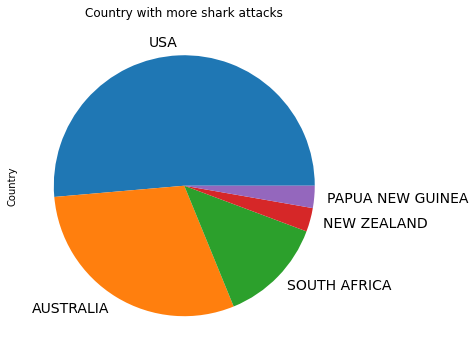

In [18]:
df_loc['Country'].value_counts().nlargest(5).plot.pie(labels = ['USA','AUSTRALIA','SOUTH AFRICA','NEW ZEALAND','PAPUA NEW GUINEA'], fontsize = 14, figsize = (6,6), title = 'Country with more shark attacks')

# Conclusión:

- USA es el país con mayor número de casos por ataques de tiburón para cualquier actividad presentada,
con 2094 casos, con registros que datan desde el siglo XX hasta 2018.

- AUSTRALIA es el segundo país con mayor número de casos, con 1215 casos (registros de 1845 hasta 2018)'''

In [20]:
#Si tomamos el no. de accidentes por SURFING en USA, sería

df_usa_surf = df_loc[df_loc['Country'] == 'USA']
df_usa_surf

,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
7,27-May-2018,2018.0,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N
8,26-May-2018,2018.0,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N
...,...,...,...,...,...,...,...,...,...,...,...
6233,"No date, Before 1902",0.0,USA,Florida,"Mosquito Inlet (Ponce Inlet), Volusia County",Canoeing,male,M,NaN,FATAL,Y
6249,Before 1958,0.0,USA,Florida,"Palm Beach, Palm Beach County",Standing,Horton Chase,M,NaN,Abrasions & bruises hip to ankle,N
6283,Before 1921,0.0,USA,Florida,"Gadsden Point, Tampa Bay",Fishing,James Kelley,M,NaN,2-inch lacerations,N
6288,Before 17-Jul-1916,0.0,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,"""youthful male""",M,NaN,"""Lost leg""",N


In [21]:
df_usa_surf_2 = df_usa_surf[df_usa_surf['Activity'] == 'Surfing']
df_usa_surf_2

,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
53,31-Dec-2017,2017.0,USA,Hawaii,"Hultin's Beach, Oahu",Surfing,Marjorie Mariano,F,54,Severe lacerations to left thigh & knee,N
54,30-Dec-2017,2017.0,USA,California,"Drakes Estero, Point Reyes, Marin County",Surfing,Natalie Jones,F,35,Foot bitten,N
61,18-Nov-2017,2017.0,USA,Florida,"Floridana Beach, Brevard County",Surfing,Kaia Anderson,F,14,Heel bitten,N
74,09-Oct-2017,2017.0,USA,Hawaii,"Davidsons Beach, Kekaha, Kauai",Surfing,Mitch Milan,M,54,Lacerations to left hand,N
...,...,...,...,...,...,...,...,...,...,...,...
3643,1965,1965.0,USA,California,"Dana Point, San Clemente, Orange County",Surfing,Barry Berg,M,Teen,Puncture wounds to foot when he stepped on a s...,N
4284,30-Aug-1955,1955.0,USA,California,"Zuma Beach, Santa Monica, Los Angeles County",Surfing,Dale Strand,M,25,"Surfer grabbed shark, which turned & bit him a...",N
6097,1828,1828.0,USA,Hawaii,"Uo, Lahaina, Maui",Surfing,Male,M,NaN,FATAL,Y
6143,1779,1779.0,USA,Hawaii,"Maliu, Hawai'i",Surfing,Nu'u-anu-pa'a hu,M,young,"FATAL, buttock lacerated",Y


In [22]:
df_usa_surf_2.Area.value_counts()

Florida           367
California         75
Hawaii             57
Oregon             23
North Carolina     19
South Carolina      9
Texas               7
New York            2
Puerto Rico         1
New Jersey          1
Washington          1
Georgia             1
Virginia            1
Name: Area, dtype: int64

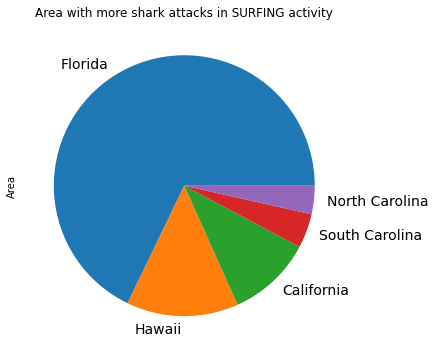

In [23]:
df_usa_surf_2['Area'].value_counts().nlargest(5).plot.pie(labels = ['Florida', 'Hawaii', 'California', 'South Carolina', 'North Carolina'], fontsize = 14, figsize = (6,6), title = 'Area with more shark attacks in SURFING activity')

# Conclusión:

Desde que se tiene los registros documentados, como ***USA*** presenta el mayor número de incidencias por ataques de tiburón,
se concluye que ***Florida es el área más afectada con un número de 367 registros llevados***, seguido de **Hawaii con 75 casos**.
Esto quizás se debe por la mayor afluencia de turismo que realiza *SURFING*

In [25]:
#Realizo una copia 

df3 = df_loc.copy()
df3.head()

,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
3,08-Jun-2018,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N
4,04-Jun-2018,2018.0,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N


# Subcaso 1.1 : Análisis de Ataques en USA en el año 2018

In [26]:
#Para analizar la gráfica de ataques de tiburón que se han registrado en el DataFrame, en el último año (2018), en USA, es el siguiente:
#Filtro mi información del año 2018:

df3['Year'] = df3['Year'].apply(str)
df3.dtypes

Date           object
Year           object
Country        object
Area           object
Location       object
Activity       object
Name           object
Sex            object
Age            object
Injury         object
Fatal (Y/N)    object
dtype: object

In [27]:
#Limpio información para sacar en específico el año 2018 de mi DataFrame

df_year = df3[df3['Year'] == '2018.0']
df_year

,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
3,08-Jun-2018,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N
4,04-Jun-2018,2018.0,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N
5,03-Jun-2018,2018.0,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N
6,03-Jun-2018,2018.0,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y
7,27-May-2018,2018.0,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N
8,26-May-2018,2018.0,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N
9,26-May-2018,2018.0,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N


In [28]:
#Selecciono únicamente USA en Country para filtrar el no. de casos

df_usa = df_year[df_year['Country'] == 'USA']
df_usa

,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
7,27-May-2018,2018.0,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N
8,26-May-2018,2018.0,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N
9,26-May-2018,2018.0,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N
11,21-May-2018,2018.0,USA,South Carolina,"Isle of Palms, Charleston County",Boogie boarding,Trey de Boer,M,10,Injuries to lower right leg and foot,N
12,13-May-2018,2018.0,USA,South Carolina,"Hilton Head Island, Beaufort County",Swimming,Jei Turrell,M,10,Severe bite to right forearm,N
25,19-Apr-2018,2018.0,USA,Hawaii,"Shipwrecks Beach, Keoneloa Bay, Kauai",Body boarding,Dylan McWilliams,M,29,Lacerations to right lower leg,N
35,31-Mar-2018,2018.0,USA,Hawaii,Kukio Beach,Stand-Up Paddleboarding,male,M,25,Injuries to right leg & hand,N


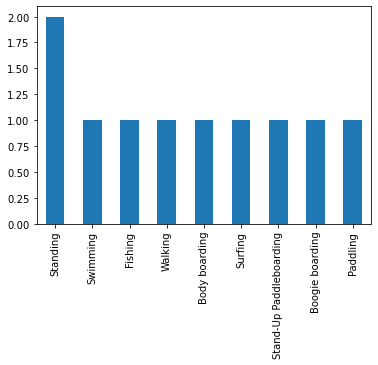

In [29]:
#Gráfica de barras para el subcaso 1.1:

df_usa['Activity'].value_counts().plot(kind = 'bar')

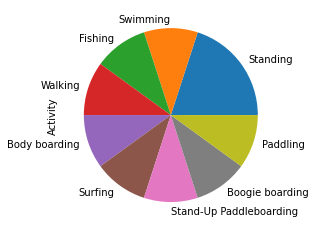

In [30]:
df_usa['Activity'].value_counts().plot(kind = 'pie')

# Conclusion subcaso 1.1:

Para este subcaso, el mayor número de casos que se presenta en USA en el año 2018, 
es la actividad ***Standing***, que presentó *2 casos*.

# Subcaso 1.2: Análisis de Ataques en USA entre los años 2013 - 2018

In [32]:
#Para conocer los ataques realizados en USA durante el periodo de 2013 - 2018, realizamos el siguiente DataFrame

In [33]:
#Realizamos una copia de df3

df4 = df3.copy()
df4

,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
3,08-Jun-2018,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N
4,04-Jun-2018,2018.0,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...,...,...,...,...,...,...
6296,Before 1906,0.0,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,NaN,FATAL,Y
6297,Before 1903,0.0,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y
6298,Before 1903,0.0,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y
6299,1900-1905,0.0,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y


In [34]:
#Limpiamos la información para los casos que se registraron entre los años 2013 y 2018

df_year_2 = df4[(df4['Year'] >= '2013.0') & (df4['Year'] <= '2018.0')]
df_year_2

,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
3,08-Jun-2018,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N
4,04-Jun-2018,2018.0,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...,...,...,...,...,...,...
707,25-Jan-2013,2013.0,AUSTRALIA,Queensland,Noosa,Surfing,Matthew Cassaigne,M,NaN,Lacerations to neck,N
708,Reported 21-Jan-2013,2013.0,AUSTRALIA,Queensland,Bullcock Beach,Dragging stranded shark into deeper water,Paul Marshallsea,M,62,"No injury, a 3 m blue shark merely snapped at ...",NaN
709,16-Jan-2013,2013.0,USA,Hawaii,Kiholo Bay,Surfing,Paul Santos,M,43,Left forearm bitten,N
710,13-Jan-2013,2013.0,NEW ZEALAND,Mercury Islands,Great Mercury Island,Spearfishing,Kim Bade,M,NaN,Minor cut on finger,N


In [35]:
#Obtenemos información detallada en el país de USA (que es nuestro principal objetivo) de revisar el no. de accidentes 

df_usa_2 = df_year_2[df_year_2['Country'] == 'USA']
df_usa_2

,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
7,27-May-2018,2018.0,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N
8,26-May-2018,2018.0,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N
...,...,...,...,...,...,...,...,...,...,...,...
689,02-Apr-2013,2013.0,USA,Hawaii,Kaanapali Shores,Surfing,male,M,58,Right thigh bitten,N
701,21-Feb-2013,2013.0,USA,Hawaii,"Ka'anapali, Honokowai, Maui",Surfing,NaN,NaN,NaN,Lacerations to right leg,N
702,21-Feb-2013,2013.0,USA,Hawaii,"Paia Bay, Maui",Surfing,Jacob Lanskey,M,NaN,"No injury, shark bit rail of foam board",N
703,10-Feb-2013,2013.0,USA,Florida,"""Stuart Rocks"", Martin County",Surfing,Cole Taschman,M,16,Lacerations to right hand,N


In [59]:
#Contabilizamos el número de accidentes por cada actividad realizada

df_usa_2.Activity.value_counts().head()

Surfing     104
Swimming     60
Wading       17
Standing     12
Fishing      10
Name: Activity, dtype: int64

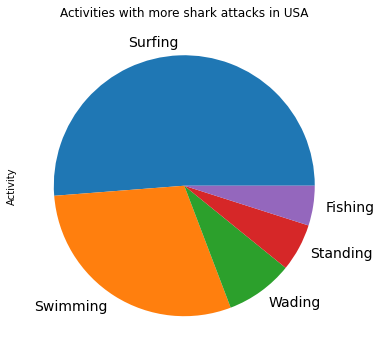

In [37]:
#Gráfica de las primeras 5 actividades de ataques de tiburón 

df_usa_2['Activity'].value_counts().nlargest(5).plot.pie(labels = ['Surfing','Swimming','Wading','Standing','Fishing'], fontsize = 14, figsize = (6,6), title = 'Activities with more shark attacks in USA')

# Conclusión:

La actividad que presenta mayor número de casos en USA,
entre los años de 2013 - 2018 fue **SURFING**, con **104 casos**,
seguido de **SWIMMING con 60 casos**. 

Es importante resaltar que estas actividades se deben por
una alta popularidad en el turismo.

# Caso 2: Accidentes registrados por GÉNERO en USA (2013 - 2018)

In [39]:
#Realizamos una copia de DataFrame USA

df5 = df_usa_2.copy()
df5.head()

,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
7,27-May-2018,2018.0,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N
8,26-May-2018,2018.0,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N


# Para hombres

In [40]:
#Realizamos el caso para hombres

df_gen_m = df5[df5['Sex'] == 'M']
df_gen_m

,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
7,27-May-2018,2018.0,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N
8,26-May-2018,2018.0,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N
9,26-May-2018,2018.0,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N
11,21-May-2018,2018.0,USA,South Carolina,"Isle of Palms, Charleston County",Boogie boarding,Trey de Boer,M,10,Injuries to lower right leg and foot,N
...,...,...,...,...,...,...,...,...,...,...,...
687,04-Apr-2013,2013.0,USA,Florida,"Jensen Beach, Martin County",Swimming,male,M,50,Lacerations to hand,N
689,02-Apr-2013,2013.0,USA,Hawaii,Kaanapali Shores,Surfing,male,M,58,Right thigh bitten,N
702,21-Feb-2013,2013.0,USA,Hawaii,"Paia Bay, Maui",Surfing,Jacob Lanskey,M,NaN,"No injury, shark bit rail of foam board",N
703,10-Feb-2013,2013.0,USA,Florida,"""Stuart Rocks"", Martin County",Surfing,Cole Taschman,M,16,Lacerations to right hand,N


# Para área

In [41]:
df_gen_m.Area.value_counts()

Florida           115
Hawaii             38
California         32
South Carolina     18
North Carolina     10
Massachusetts       3
Texas               3
Oregon              2
New York            1
Maryland            1
Georgia             1
New Jersey          1
Delaware            1
Alabama             1
Washington          1
Louisiana           1
Name: Area, dtype: int64

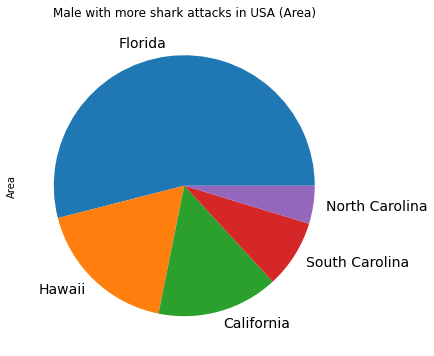

In [42]:
df_gen_m['Area'].value_counts().nlargest(5).plot.pie(labels = ['Florida','Hawaii','California','South Carolina', 'North Carolina'], fontsize = 14, figsize = (6,6), title = 'Male with more shark attacks in USA (Area)')

In [43]:
#Conclusión:

#Florida presenta mayor número de incidentes presentados en el periodo 2013-2018, con un total de 115 para cualquier actividad


# Por actividad

In [44]:
df_gen_m.Activity.value_counts().head()

Surfing     87
Swimming    37
Wading      11
Fishing      9
Standing     9
Name: Activity, dtype: int64

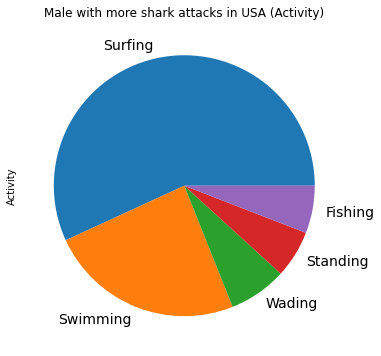

In [45]:
df_gen_m['Activity'].value_counts().nlargest(5).plot.pie(labels = ['Surfing', 'Swimming','Wading','Standing','Fishing'], fontsize = 14, figsize = (6,6), title = 'Male with more shark attacks in USA (Activity)')

# Para mujeres

In [46]:
df_gen_f = df5[df5['Sex'] == 'F']
df_gen_f

,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N
53,31-Dec-2017,2017.0,USA,Hawaii,"Hultin's Beach, Oahu",Surfing,Marjorie Mariano,F,54,Severe lacerations to left thigh & knee,N
54,30-Dec-2017,2017.0,USA,California,"Drakes Estero, Point Reyes, Marin County",Surfing,Natalie Jones,F,35,Foot bitten,N
61,18-Nov-2017,2017.0,USA,Florida,"Floridana Beach, Brevard County",Surfing,Kaia Anderson,F,14,Heel bitten,N
...,...,...,...,...,...,...,...,...,...,...,...
644,31-Jul-2013,2013.0,USA,Hawaii,"Ulua Beach, Maui",Snorkeling,Evonne Cashman,F,56,"Lacerations to hand, face and torso",N
652,19-Jul-2013,2013.0,USA,Alabama,"Gulf Shores, Baldwin County",Walking in surf,Laura Havrylkoff,F,50,Lacerations and abrasions to foot and ankle,N
656,11-Jul-2013,2013.0,USA,North Carolina,Holden Beach. Brunswick County,Wading,Barbara Corey,F,63,Right foot bitten,N
667,15-Jun-2013,2013.0,USA,Florida,"Atlantic Beach, Duval County",Surfing,female,F,NaN,Lacerations to left ankle,N


# Por área

In [47]:
df_gen_f.Area.value_counts().head()

Florida           36
Hawaii            14
South Carolina    12
California        10
North Carolina     3
Name: Area, dtype: int64

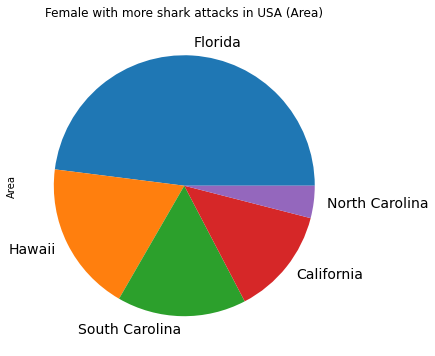

In [48]:
df_gen_f['Area'].value_counts().nlargest(5).plot.pie(labels = ['Florida','Hawaii','South Carolina','California', 'North Carolina'], fontsize = 14, figsize = (6,6), title = 'Female with more shark attacks in USA (Area)')

# Por actividad

In [49]:
df_gen_f.Activity.value_counts().head()

Swimming           22
Surfing            15
Snorkeling          7
Wading              6
Boogie boarding     4
Name: Activity, dtype: int64

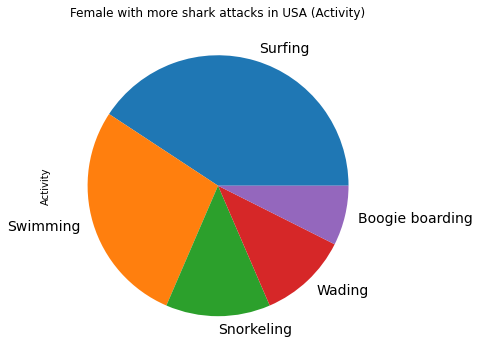

In [50]:
df_gen_f['Activity'].value_counts().nlargest(5).plot.pie(labels = ['Surfing', 'Swimming','Snorkeling','Wading','Boogie boarding'], fontsize = 14, figsize = (6,6), title = 'Female with more shark attacks in USA (Activity)')

# Conclusión:

- Hay mayor número de incidencias en hombres que en mujeres.

- Las actividades con mayor casos es el **SURFING** para ambos géneros.

- Florida presenta más casos en hombres que en mujeres.

- *Existe diferencias de accidentes por actividad en mujeres que permitan una actividad más tranquila*.

# Caso 3: INJURIES en surfistas registradas en USA (2013-2018)

In [52]:
#Realizamos una copia de USA 2013-2018

df6 = df_usa_2.copy()
df6.head()

,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
7,27-May-2018,2018.0,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N
8,26-May-2018,2018.0,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N


In [53]:
#Analizar 'Injury' en surfistas

df_surf_inj = df6[(df6['Activity'] == 'Surfing')]['Injury'].value_counts()
df_surf_inj

Foot bitten                                              5
Lacerations to right foot                                3
Minor injury to left foot                                3
Heel bitten                                              2
Laceration to left hand                                  2
                                                        ..
Minor injury to right hand                               1
Board reportedly bumped by shark. No injury              1
Laceration to heel, puncture wounds to dorsum of foot    1
Lacerations to right leg                                 1
Lower leg bitten                                         1
Name: Injury, Length: 86, dtype: int64

In [54]:
#Tomamos de partida 'board' como referencia de la actividad de surf, si la actividad es nula para el registro

f1 = (df6['Injury'].str.contains(' board ', na = False, regex = False))
f2 = (df6['Injury'].str.contains('on board ', na = False, regex = False))
f3 = (df6['Injury'].str.contains('off board ', na = False, regex = False))

new_f = df6[f1 & ~f2 & ~f3]

In [55]:
new_f


,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
100,23-Aug-2017,2017.0,USA,Massachusetts,"Marconi Beach, Wellfleet, Barnstable County",SUP,Cleveland Bigelow,M,69,Not injured by shark but board bitten,N
215,17-Sep-2016,2016.0,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Yuma,M,43,"No injury, board bitten",N
232,06-Aug-2016,2016.0,USA,Hawaii,Maui,SUP Foil boarding,Connor Baxter,M,21,"No inury, shark & board collided",N
246,15-Jul-2016,2016.0,USA,California,"Surfside, Orange County",Kite surfing,Lee Frees,M,61,"No injury, board damaged",N
265,07-Jun-2016,2016.0,USA,South Carolina,"Folly Beach, Charleston County",Surfing,Jack O'Neill,M,27,"No injury, board damaged",NaN
600,22-Nov-2013,2013.0,USA,Oregon,"Gleneden Beach, Lincoln County",Surfing,Andrew Gardiner,M,25,"No injury, board bitten",N


# Conclusión:

- No existen lesiones hacia los surfistas, solamente daños en su tabla como mordidas de tiburón o eventos infortunios.

In [57]:
#Comprobar si hay algún registro diferente para 'Surfing'

new_f_2 = new_f[(new_f['Activity'] != 'Surfing')]
new_f_2

,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
100,23-Aug-2017,2017.0,USA,Massachusetts,"Marconi Beach, Wellfleet, Barnstable County",SUP,Cleveland Bigelow,M,69,Not injured by shark but board bitten,N
232,06-Aug-2016,2016.0,USA,Hawaii,Maui,SUP Foil boarding,Connor Baxter,M,21,"No inury, shark & board collided",N
246,15-Jul-2016,2016.0,USA,California,"Surfside, Orange County",Kite surfing,Lee Frees,M,61,"No injury, board damaged",N


# Conclusión:

Existen 3 casos que fueron actividades similares a SURFING, tales son:

- **SUP** (en ingles, Stand-Up Paddleboarding, o surf en remo).
- **SUP Foil Boarding** (Surf de remo con tabla de surf).
- **Kite surfing** (surf en vela).

No hubo lesiones al surfista.